In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 4

from sklearn.model_selection import train_test_split

### 1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).


In [2]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 2. Проведите первичный анализ.
а) Проверьте количество записей для каждого класса. Сделайте вывод.


In [3]:
# Видим, что соеди значений нет 4-го класса
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [4]:
# 1-й и 2-й классы заметно предобладают над отсальными.
glass['Type'].value_counts().sort_values(ascending=False)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
# дынне не имюет пропусков
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.isna().count()

RI      214
Na      214
Mg      214
Al      214
Si      214
K       214
Ca      214
Ba      214
Fe      214
Type    214
dtype: int64

In [7]:
glass.isnull().count()

RI      214
Na      214
Mg      214
Al      214
Si      214
K       214
Ca      214
Ba      214
Fe      214
Type    214
dtype: int64

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.


In [8]:
X = glass.loc[:, glass.columns != 'Type']
y = glass['Type']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### 4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(random_state=13)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

### 5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).


In [12]:
from sklearn.metrics import accuracy_score

In [13]:
# Предсказания
rfc_y_pred = rfc.predict(X_test)

In [14]:
# Accuracy
accuracy_score(y_test, rfc_y_pred)

0.7441860465116279

### 6. Обработайте выбросы в данных.
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?


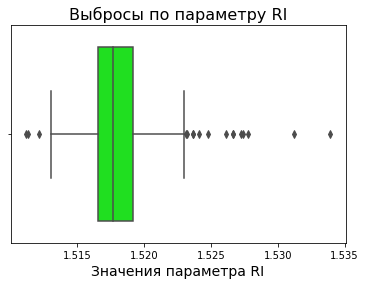

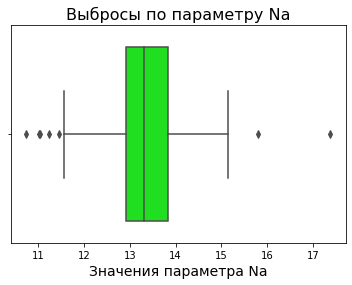

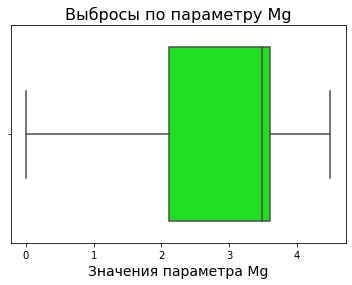

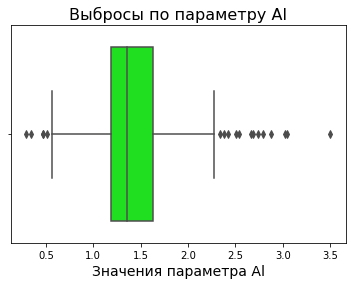

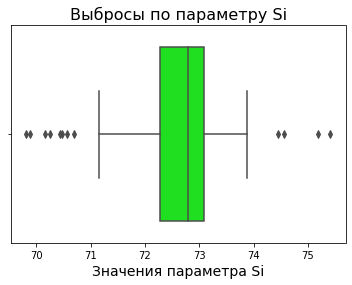

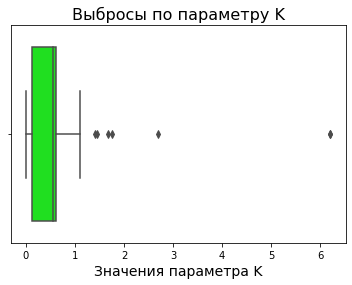

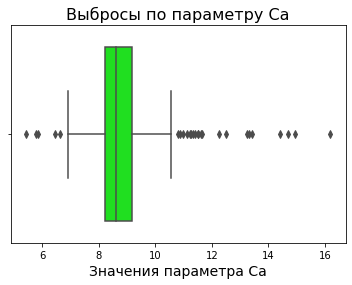

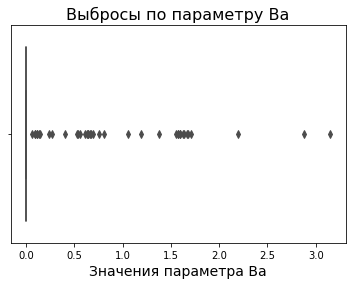

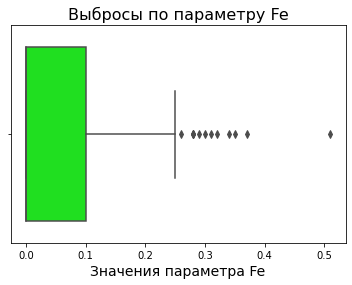

In [15]:
# Boxplot
for col in list(X.columns):
    sns.boxplot(x=glass[col], color='lime')
    plt.title(f'Выбросы по параметру {col}', fontdict={'size':16})
    plt.xlabel(f'Значения параметра {col}', fontdict={'size':14})

    plt.show()

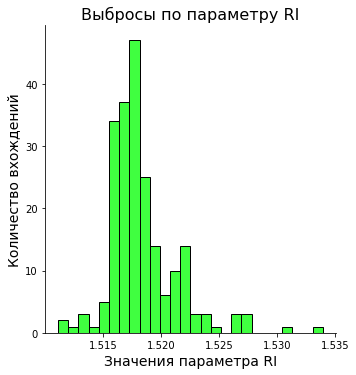

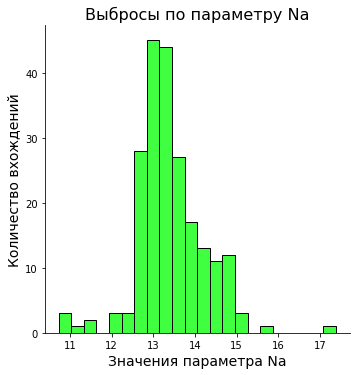

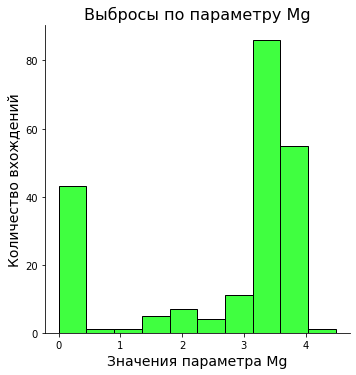

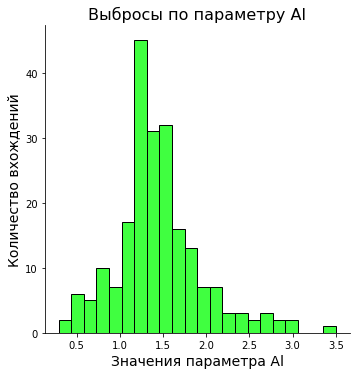

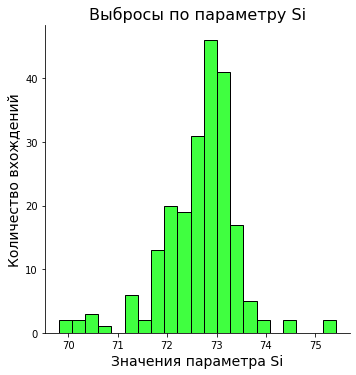

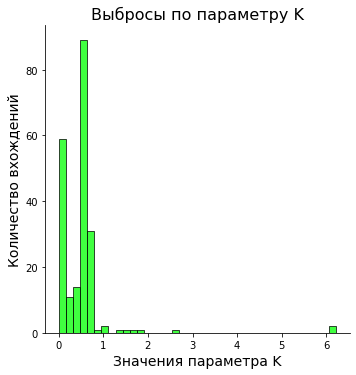

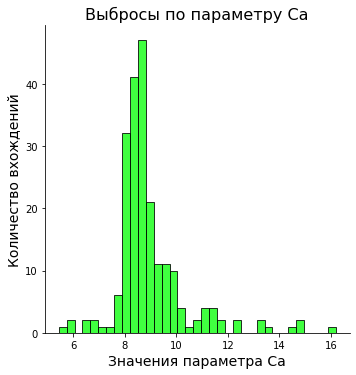

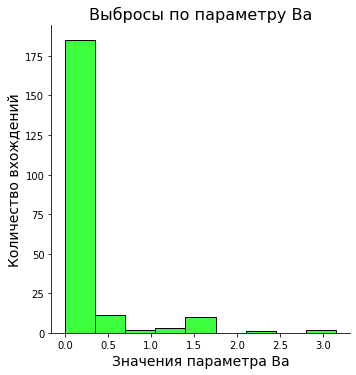

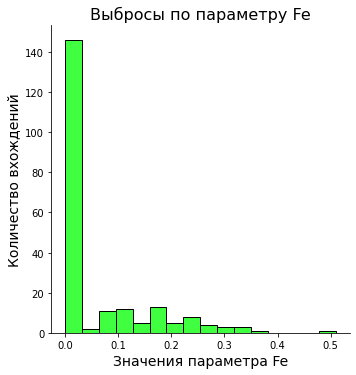

In [16]:
# Distplot
for col in list(X.columns):
    sns.displot(x=glass[col], color='lime')
    plt.title(f'Выбросы по параметру {col}', fontdict={'size':16})
    plt.xlabel(f'Значения параметра {col}', fontdict={'size':14})
    plt.ylabel('Количество вхождений', fontdict={'size':14})
    plt.show()

b) Исследуйте признаки на выбросы несколькими способами.


In [17]:
# Изоляционное древо. contamination=0.05, иначе много выбросов находит
from sklearn.ensemble import IsolationForest
iso_f = IsolationForest(contamination=0.05, random_state=13).fit(X_train, y_train)
glass['Anomaly_1'] = iso_f.predict(X)
iso_f_anomaly_index = list(glass[glass['Anomaly_1'] == -1].index)

In [18]:
# Эллиптический "конверт" :). contamination=0.05, иначе много выбросов находит
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.05, random_state=13).fit(X_train, y_train)
glass['Anomaly_2'] = ee.predict(X)
ee_anomaly_index = list(glass[glass['Anomaly_2'] == -1].index)

In [19]:
# Локальный фактор выбросов, методом подбора наилучший n_neighbors = 2.(Иначе сильно больше 10%)
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=2, novelty=True).fit(X_train, y_train)
glass['Anomaly_3'] = lof.predict(X)
lof_anomaly_index = list(glass[glass['Anomaly_3'] == -1].index)

In [20]:
print(f'Количество выбросов IsolationForest: {len(iso_f_anomaly_index)}\nКоличество выбросов EllipticEnvelope: {len(ee_anomaly_index)}\nКоличество выбросов LocalOutlierFactor: {len(lof_anomaly_index)}')

Количество выбросов IsolationForest: 12
Количество выбросов EllipticEnvelope: 10
Количество выбросов LocalOutlierFactor: 10


c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.


In [21]:
# Сделал список индексов с выбросами из наших 3 моделей. Вышло чуть более 10%
indexes = list(set(iso_f_anomaly_index+ee_anomaly_index+lof_anomaly_index))
len(indexes)

25

In [22]:
# Создадим копию для дальнейших преобразований.
clear_glass = glass.copy(deep=True)

In [23]:
clear_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Anomaly_1,Anomaly_2,Anomaly_3
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1,1,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1,-1,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1,-1,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1,1,1


In [24]:
# Будем удалять только те выбросы, которые нашли каждая из наих 3-х моделей.
clear_glass = clear_glass.drop(indexes)

In [25]:
# Удалим наши классификаторы аномальности
clear_glass = clear_glass.drop(columns=['Anomaly_1', 'Anomaly_2', 'Anomaly_3'])

In [26]:
clear_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.0,7
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


### 7. Повторите п. 4, п. 5.


In [27]:
X1 = clear_glass.loc[:, clear_glass.columns != 'Type']
y1 = clear_glass['Type']

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=13)

In [29]:
rfc_1 = RandomForestClassifier(random_state=13)
rfc_1.fit(X1_train, y1_train)

RandomForestClassifier(random_state=13)

In [30]:
rfc1_y_pred = rfc_1.predict(X1_test)

In [31]:
# Accuracy
accuracy_score(y1_test, rfc1_y_pred)

0.6842105263157895

### 8. Сформулируйте выводы по проделанной работе.
а) Кратко опишите, какие преобразования были сделаны с данными.


Загрузили данные, проверили на пропуски. разделили на ирзнаки и выборку для обучения и проверки.

Обучли модель RandomForestClassifier на неочищенных от выбросов данных.

Посмотрели метрику точности accuracy.

После посторили графики и визуально оценили выбросы.

Провели при помощи 3 моделей оценку выбросов и убарил из df выбросы по индексам.

Провели повторное обучение RandomForestClassifier и вывели метрику точности.

b) Сравните точность двух моделей.


In [32]:
print(f'До отчистки от выбросов, точность: {accuracy_score(y_test, rfc_y_pred)}\nПосле отчистки от выбросов, точность: {accuracy_score(y1_test, rfc1_y_pred)}')

До отчистки от выбросов, точность: 0.7441860465116279
После отчистки от выбросов, точность: 0.6842105263157895


c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Безучловно нужно!
В нашем случае тоность оказалась ниже после очистки, но я это связываю это со слоедующим:
1. Визуально на графиках мы видим, что природа данных абсолютно разная и есть много ненормальных распределений, и перекосов в разные стороны. на мой вщгляд, нужно было лучше работать с каждым признаком, предобработов их и возможно работать с каждым из них более индивидуально. 